<a href="https://colab.research.google.com/github/C-S-V-S-Subrahmanyam/Amazon-Reviews-Sentiment-Analysis/blob/main/ML_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Sentiment Analysis on Amazon Product Reviews**
**By**

- Govvala Venkata Sai Ram → 22501A0557
- Chinthalapati Sri Venkata Sai Subrahmanyam → 22501A0533  
- Abdul Azeez → 22501A0502
- Induri Nithyananda Reddy → 22501A0566

---

## **1. Introduction**  
Sentiment analysis, also known as opinion mining, is the process of analyzing text to determine its sentiment or emotional tone. It aims to classify text as positive, negative, or neutral based on the content. With the rapid growth of e-commerce and online product reviews, analyzing customer feedback has become essential for improving products, understanding customer satisfaction, and enhancing business strategies.  

This project focuses on analyzing Amazon product reviews to predict the sentiment of each review. Using various machine learning and deep learning models, the goal is to classify reviews into positive, negative, and neutral categories. By comparing the performance of different models, the most effective model for sentiment analysis will be identified.  

---

## **2. Problem Statement**  
Customer reviews play a significant role in influencing purchasing decisions on e-commerce platforms. However, the sheer volume of reviews makes it impossible to manually analyze them. The problem is to automatically analyze the sentiment of customer reviews and classify them into positive, negative, or neutral categories using machine learning and deep learning models.  

### **Challenges:**  
- Large and noisy dataset with irrelevant information.  
- Complex language, slang, abbreviations, and typos in reviews.  
- Imbalance in sentiment classes (more positive than negative or neutral).  
- Need for high accuracy and generalization across different product categories.  

---

## **3. Objectives**  
- To collect and preprocess the Amazon product reviews dataset.  
- To explore and analyze the data to understand patterns and trends.  
- To develop machine learning models to classify sentiment in reviews.  
- To optimize model performance using different tuning techniques.  
- To evaluate model performance using accuracy, precision, recall, and F1-score.  
- To identify the best-performing model and test it with new data inputs.  

---


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Step 1: Data Collection/Ingestion**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sb
from sklearn import metrics
from nltk import classify
from nltk import NaiveBayesClassifier
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import math
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sb.set_style("whitegrid")
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
csv_file = "/content/drive/MyDrive/Reviews.csv"
df = pd.read_csv(csv_file)
print("Number  of  Products  for  reviews :", len(df["ProductId"].unique()))
print("Number of Unique users for reviews :", len(df["UserId"].unique()))
df.head()

Number  of  Products  for  reviews : 74258
Number of Unique users for reviews : 256059


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [6]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

**Dataset Attributes**
- **Id**: Unique identifier for each review.
- **ProductId**: ID of the reviewed product.
- **UserId**: Unique identifier for the reviewer.
- **ProfileName**: Name of the reviewer.
- **HelpfulnessNumerator/Denominator**: Helpfulness ratings of the review.
- **Score**: Rating (1 to 5), serves as the sentiment label.
- **Time**: Timestamp of the review.
- **Summary**: Short title of the review.
- **Text**: Full review content.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
# Cheking if there are null values in our dataset
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [8]:
# checking data types of various columns
df.dtypes

,0
Id,int64
ProductId,object
UserId,object
ProfileName,object
HelpfulnessNumerator,int64
HelpfulnessDenominator,int64
Score,int64
Time,int64
Summary,object
Text,object


# **Step 2: Data Preprocessing**

Removing Uncessary Columns

So that we can reduce processing time to make it work for slow systems too. You can take all the 568k records if your system is efficient enough

In [9]:
data = df.copy()
data = data.drop(["Id","UserId","Time", "HelpfulnessNumerator", "HelpfulnessDenominator", "ProfileName"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ProductId  568454 non-null  object
 1   Score      568454 non-null  int64 
 2   Summary    568427 non-null  object
 3   Text       568454 non-null  object
dtypes: int64(1), object(3)
memory usage: 17.3+ MB


In [10]:
data.head()

,ProductId,Score,Summary,Text
0,B001E4KFG0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,2,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,5,Great taffy,Great taffy at a great price. There was a wid...


Getting only unique Product

In [11]:
asins_unique = len(data["ProductId"].unique())
print(f"Number of Unique Product IDs: {asins_unique}")

Number of Unique Product IDs: 74258


Ploting Score Graphs

So that we will get the overview, without calculating number of each score

Histogram

This graph is showing how many reviews get a specific score

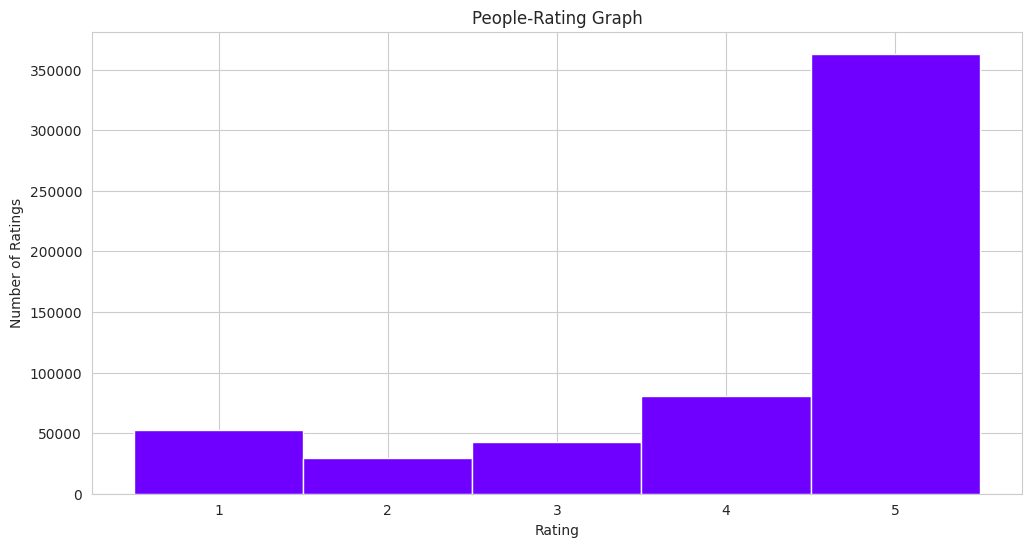

In [12]:
x_axis_rating = data["Score"]
x_axis_rating.hist(bins=[0.5,1.5,2.5,3.5,4.5,5.5], figsize=(12,6), grid=True, color="#6f00ff")

plt.title("People-Rating Graph")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.show()

Box-Plot

Box-Plot gives the concentration data distribution

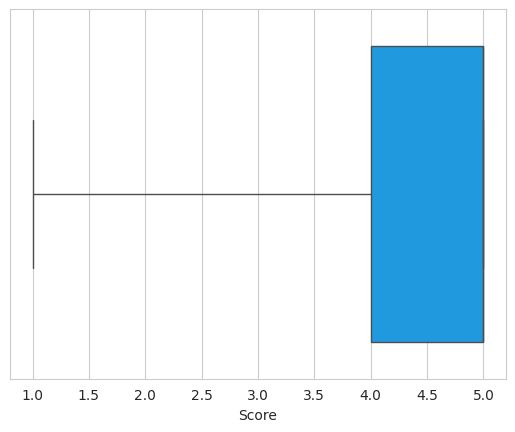

In [13]:
sb.boxplot(x="Score", data=data, whis=5, color="#00a2ff");

Violin-Plot

Violin-Plot gives the frequency distribution of the data to visualize how the data is distributed and which points have more concentration of the data

<Axes: ylabel='Score'>

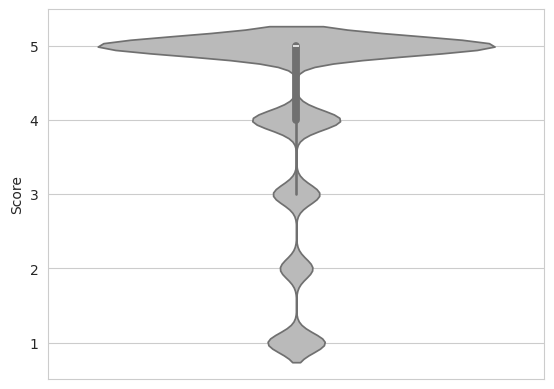

In [14]:
sb.violinplot(y="Score", data=data, bw=0.1, color="#A5158C")

Dropping null values

Our data does not have any null values, that's why it won't affect data

In [15]:
dataAfter = data.dropna(subset=["Score"])
dataAfter["Score"] = dataAfter["Score"].astype(int)

Splitting data into TRAIN & TEST datasets

Data is splitted up after shuffling

In [16]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["Score"]):
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

Checking length of the Train dataset and the percentage of each score

In [17]:
len(strat_train)

454763

In [18]:
strat_train["Score"].value_counts()/len(strat_train)

,count
Score,
5,0.638790
4,0.141885
1,0.091947
3,0.075010
2,0.052368


Checking length of the Test dataset and the percentage of each score

In [19]:
len(strat_test)

113691

In [20]:
strat_test["Score"].value_counts()/len(strat_test)

,count
Score,
5,0.638784
4,0.141885
1,0.091951
3,0.075010
2,0.052370


Using Shuffled Train Dataset

Checking the Top 5 Records

In [21]:
reviews = strat_train.copy()
reviews.head()

,ProductId,Score,Summary,Text
531452,B000H26JEW,5,Taste Enhancer,I have looked for this product in Canada for a...
394807,B0018CIGMS,4,dog treats,fast shipping & the product was as promised. a...
266494,B001M050CU,5,Nestles Fat Free Hot Chocolate,"Always my favorite, but getting harder and har..."
490342,B000EDBPQ6,5,Delicious!,We've made both pancakes and crepes with this ...
372078,B000SATIFA,5,tea,This is a great tea. I have been very satisfie...


Finding Number of Unique Products

In [22]:
print(f"Number of unique Product IDs in Trained Data Reviews: ", len(reviews["ProductId"].unique()))

Number of unique Product IDs in Trained Data Reviews:  67641


Checking basic info of the Data Frame before further processing

In [23]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 454763 entries, 531452 to 130931
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ProductId  454763 non-null  object
 1   Score      454763 non-null  int64 
 2   Summary    454744 non-null  object
 3   Text       454763 non-null  object
dtypes: int64(1), object(3)
memory usage: 17.3+ MB


Finding Mean of all the ratings of train dataset

In [24]:
reviews["Score"].mean()

np.float64(4.183203118987253)

Counting Number of reviews of each Product from the Train dataset

In [25]:
counts = reviews["ProductId"].value_counts().to_frame()
counts.head(10)

,count
ProductId,
B007JFMH8M,724
B003B3OOPA,509
B002QWP8H0,504
B002QWP89S,504
B0026RQTGE,501
B002QWHJOU,493
B0026KNQSA,457
B005K4Q37A,455
B000KV7ZGQ,455


Calculating the Mean rating score of each Product in the Train Dataset

In [26]:
avg_rating = reviews.groupby("ProductId")["Score"].mean().to_frame()
avg_rating.head(10)

,Score
ProductId,
0006641040,4.406250
141278509X,5.000000
2734888454,5.000000
2841233731,5.000000
7310172001,4.789062
7310172101,4.737226
7800648702,5.000000
9376674501,5.000000
B00002N8SM,1.718750


Grouping the Product count and the Mean rating of each product in Train Dataset to form a Table

In [27]:
table = counts.join(avg_rating)
table.head(30)

,count,Score
ProductId,,
B007JFMH8M,724,4.574586
B003B3OOPA,509,4.728880
B002QWP8H0,504,4.595238
B002QWP89S,504,4.615079
B0026RQTGE,501,4.598802
B002QWHJOU,493,4.567951
B0026KNQSA,457,4.312910
B005K4Q37A,455,3.817582
B000KV7ZGQ,455,3.391209


Scatter Plot

Scatter plots are used to observe relationships between variables. The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole. Here, we can conclude that the number of times a product being purchased is affecting it's rating either in a good or a bad way.

ValueError: x and y must be the same size

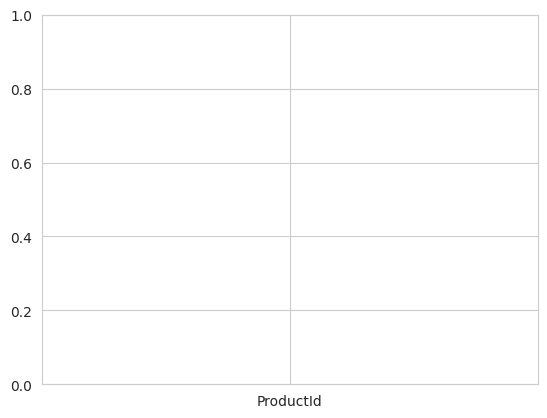

In [28]:
plt.scatter("ProductId", "Score", data=table);

Classifying the review on the basis of rating

In [29]:
def label_sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"

strat_train["Sentiment"] = strat_train["Score"].apply(label_sentiments)
strat_test["Sentiment"] = strat_test["Score"].apply(label_sentiments)

Calculating Algos' Metrics

Calculating Precision, Recall and F-Score of the Algorithm using TP,TN,FP,FN

In [30]:
# Calculating other metrics

def calculate_precision(conf_mat):
    return (conf_mat[2][2]) / (conf_mat[2][2] + conf_mat[2][0])


def calculate_recall(conf_mat):
    return (conf_mat[2][2]) / (conf_mat[2][2] + conf_mat[0][2])


def calculate_f_score(algo_precision, algo_recall):
    return (2*(algo_precision * algo_recall)) / (algo_precision + algo_recall)

Pre-Processing Data

Checking Number of Samples

In [31]:
X_train = strat_train["Text"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["Text"]
X_test_targetSentiment = strat_test["Sentiment"]
print(f"Number of Training Samples: {len(X_train)}")
print(f"Number of Test Data Samples: {len(X_test)}")

Number of Training Samples: 454763
Number of Test Data Samples: 113691


1. Filling NA's with EMPTY STRING
2. Transforming data to Count Vectors - The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words
3. Getting Number of Samples and the Distinct Words

In [32]:
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape
print(f"Number of Training Samples: {X_train_counts.shape[0]}")
print(f"Number of Distinct Words: {X_train_counts.shape[1]}")

Number of Training Samples: 454763
Number of Distinct Words: 109342


DF-IDF Transformation

1. Stop Word Removal
2. PoS tagging
3. We have already tokenize data using CountVectorizer. By using Stop word removal, POS tagging etc. we may not analyse the data correctly because some of the important words that distinguish the class of data get removed. That's why we are using TF-IDF transformation that will automatically assign less weight to unimportant words and the important words or the class distinguishers won't get removed. Moreover, visit https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/ for detailed explanation

In [33]:
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape
print(f"Number of Training Samples: {X_train_tfidf.shape[0]}")
print(f"Number of Distinct Words: {X_train_tfidf.shape[1]}")

Number of Training Samples: 454763
Number of Distinct Words: 109342


Applying Classification Algorithms

Multinominal Naive Bayes

It calculates the probability of an occurence based on the training / prior data. It is based on Bayes theorem. For more details visit https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [34]:
# Multinominal Niave Bayes
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

np.float64(0.7986120273372562)

In [35]:
# classification_report and accuracy_score
print("Classification Report")
print(f"{classification_report(X_test_targetSentiment, predictedMultiNB)}")
print(f"Accuracy: {accuracy_score(X_test_targetSentiment, predictedMultiNB)}")

Classification Report
              precision    recall  f1-score   support

    Negative       0.92      0.13      0.23     16408
     Neutral       0.19      0.00      0.00      8528
    Positive       0.80      1.00      0.89     88755

    accuracy                           0.80    113691
   macro avg       0.64      0.38      0.37    113691
weighted avg       0.77      0.80      0.72    113691

Accuracy: 0.7986120273372562


Confusion Matrix (Rows | Columns : Negative, Neutral, Positive)

In [74]:
acc_mnb=accuracy_score(X_test_targetSentiment, predictedMultiNB)

In [36]:
conf_arr_mnb = metrics.confusion_matrix(X_test_targetSentiment, predictedMultiNB)
conf_arr_mnb

array([[ 2146,     2, 14260],
       [   89,     5,  8434],
       [   92,    19, 88644]])

Calculating metrics for algorithm as a whole
1 - Precision
2 - Recall
3 - F1-Score

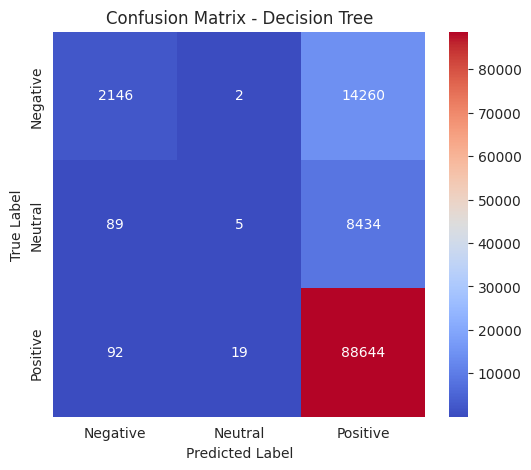

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_arr_mnb, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Negative', 'Neutral','Positive'], yticklabels=['Negative', 'Neutral','Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [37]:
total_precision = calculate_precision(conf_arr_mnb)
total_recall = calculate_recall(conf_arr_mnb)
total_f_score = calculate_f_score(total_precision, total_recall)

print("Precision of the Algorithm : ", total_precision)
print("Recall  of the   Algorithm : ", total_recall)
print("F-Score  of the  Algorithm : ", total_f_score)

Precision of the Algorithm :  0.9989632167327804
Recall  of the   Algorithm :  0.8614242400684132
F-Score  of the  Algorithm :  0.9251095804633689


**Logistic Regression Classifier**

In [38]:
# Logistic Regression Classifier
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

np.float64(0.8783720787045588)

In [39]:
# classification_report and accuracy_score
print("Classification Report")
print(f"{classification_report(X_test_targetSentiment, predictedLogReg)}")
print(f"Accuracy: {accuracy_score(X_test_targetSentiment, predictedLogReg)}")

Classification Report
              precision    recall  f1-score   support

    Negative       0.77      0.71      0.74     16408
     Neutral       0.56      0.24      0.34      8528
    Positive       0.91      0.97      0.94     88755

    accuracy                           0.88    113691
   macro avg       0.75      0.64      0.67    113691
weighted avg       0.86      0.88      0.86    113691

Accuracy: 0.8783720787045588


In [75]:
acc_log=accuracy_score(X_test_targetSentiment, predictedLogReg)

In [40]:
conf_arr_lrg = metrics.confusion_matrix(X_test_targetSentiment, predictedLogReg)
conf_arr_lrg

array([[11671,   732,  4005],
       [ 1741,  2077,  4710],
       [ 1734,   906, 86115]])

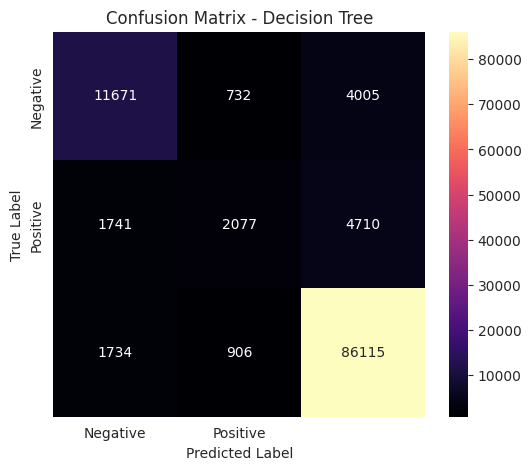

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_arr_lrg, annot=True, fmt='d', cmap='magma', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [41]:
total_precision = calculate_precision(conf_arr_lrg)
total_recall = calculate_recall(conf_arr_lrg)
total_f_score = calculate_f_score(total_precision, total_recall)

print("Precision of the Algorithm : ", total_precision)
print("Recall  of the   Algorithm : ", total_recall)
print("F-Score  of the  Algorithm : ", total_f_score)

Precision of the Algorithm :  0.9802615852200935
Recall  of the   Algorithm :  0.9555592543275633
F-Score  of the  Algorithm :  0.9677528108827942


**Support Vector Machine Classifier**

In [42]:
# Support Vector Machine Classifier
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

np.float64(0.8885927645987809)

In [43]:
# classification_report and accuracy_score
print("Classification Report")
print(f"{classification_report(X_test_targetSentiment, predictedLinearSVC)}")
print(f"Accuracy: {accuracy_score(X_test_targetSentiment, predictedLinearSVC)}")

Classification Report
              precision    recall  f1-score   support

    Negative       0.78      0.75      0.76     16408
     Neutral       0.66      0.28      0.39      8528
    Positive       0.92      0.97      0.94     88755

    accuracy                           0.89    113691
   macro avg       0.79      0.67      0.70    113691
weighted avg       0.88      0.89      0.88    113691

Accuracy: 0.8885927645987809


In [76]:
acc_svm=accuracy_score(X_test_targetSentiment, predictedLinearSVC)

In [44]:
conf_arr_svm = metrics.confusion_matrix(X_test_targetSentiment, predictedLinearSVC)
conf_arr_svm

array([[12267,   556,  3585],
       [ 1741,  2383,  4404],
       [ 1730,   650, 86375]])

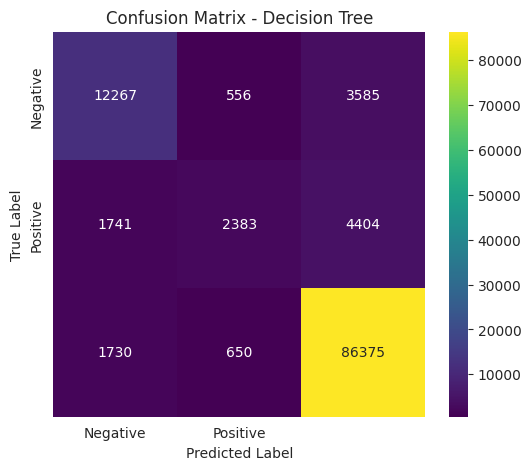

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_arr_svm, annot=True, fmt='d', cmap='viridis', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [45]:
total_precision = calculate_precision(conf_arr_svm)
total_recall = calculate_recall(conf_arr_svm)
total_f_score = calculate_f_score(total_precision, total_recall)

print("Precision of the Algorithm : ", total_precision)
print("Recall  of the   Algorithm : ", total_recall)
print("F-Score  of the  Algorithm : ", total_f_score)

Precision of the Algorithm :  0.9803643380057886
Recall  of the   Algorithm :  0.9601489550911516
F-Score  of the  Algorithm :  0.9701513492264061


**Decision Tree Classifier**

In [46]:
# Decision Tree Classifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()),
                                  ("clf_decisionTree", DecisionTreeClassifier())])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

np.float64(0.8488534712510225)

In [73]:
# classification_report and accuracy_score
print("Classification Report")
print(f"{classification_report(X_test_targetSentiment, predictedDecisionTree)}")
print(f"Accuracy: {accuracy_score(X_test_targetSentiment, predictedDecisionTree)}")

Classification Report
              precision    recall  f1-score   support

    Negative       0.66      0.65      0.66     16408
     Neutral       0.51      0.48      0.50      8528
    Positive       0.91      0.92      0.92     88755

    accuracy                           0.85    113691
   macro avg       0.70      0.68      0.69    113691
weighted avg       0.85      0.85      0.85    113691

Accuracy: 0.8488534712510225


In [77]:
acc_dt=accuracy_score(X_test_targetSentiment, predictedDecisionTree)

In [48]:
conf_arr_dct = metrics.confusion_matrix(X_test_targetSentiment, predictedDecisionTree)
conf_arr_dct

array([[10616,  1128,  4664],
       [ 1198,  4089,  3241],
       [ 4185,  2768, 81802]])

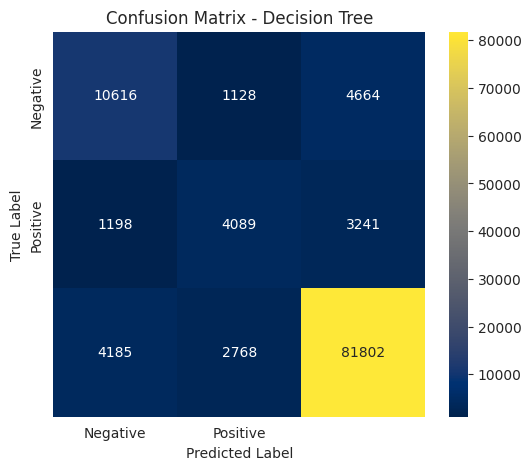

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_arr_dct, annot=True, fmt='d', cmap='cividis', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [49]:
total_precision = calculate_precision(conf_arr_dct)
total_recall = calculate_recall(conf_arr_dct)
total_f_score = calculate_f_score(total_precision, total_recall)

print("Precision of the Algorithm : ", total_precision)
print("Recall  of the   Algorithm : ", total_recall)
print("F-Score  of the  Algorithm : ", total_f_score)

Precision of the Algorithm :  0.9513298521869585
Recall  of the   Algorithm :  0.9460597228968612
F-Score  of the  Algorithm :  0.9486874684696701


**Random Forest Classifier**

In [50]:
# Random Forest Classifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier())])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

np.float64(0.8757333474065669)

In [51]:
# classification_report and accuracy_score
print("Classification Report")
print(f"{classification_report(X_test_targetSentiment, predictedRandomForest)}")
print(f"Accuracy: {accuracy_score(X_test_targetSentiment, predictedRandomForest)}")

Classification Report
              precision    recall  f1-score   support

    Negative       0.99      0.46      0.63     16408
     Neutral       0.99      0.39      0.56      8528
    Positive       0.86      1.00      0.93     88755

    accuracy                           0.88    113691
   macro avg       0.95      0.62      0.70    113691
weighted avg       0.89      0.88      0.86    113691

Accuracy: 0.8757333474065669


In [78]:
acc_rf=accuracy_score(X_test_targetSentiment, predictedRandomForest)

In [52]:
conf_arr_rfc = metrics.confusion_matrix(X_test_targetSentiment, predictedRandomForest)
conf_arr_rfc

array([[ 7566,     4,  8838],
       [   61,  3285,  5182],
       [   30,    13, 88712]])

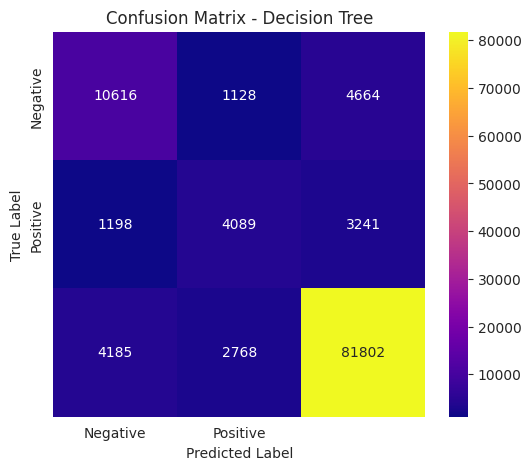

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_arr_dct, annot=True, fmt='d', cmap='plasma', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [53]:
total_precision = calculate_precision(conf_arr_rfc)
total_recall = calculate_recall(conf_arr_rfc)
total_f_score = calculate_f_score(total_precision, total_recall)

print("Precision of the Algorithm : ", total_precision)
print("Recall  of the   Algorithm : ", total_recall)
print("F-Score  of the  Algorithm : ", total_f_score)

Precision of the Algorithm :  0.9996619413580943
Recall  of the   Algorithm :  0.9094003075345977
F-Score  of the  Algorithm :  0.9523973117471497


**Grid Search CV Real-time Prediction**

In [54]:
# Grid Search CV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
             'tfidf__use_idf': (True, False),
             }
gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(X_train, X_train_targetSentiment)
new_text = ["The headphones are really good, I will buy some more products online from amazon.",
            "The phone is ok, but it works fine.",
            "The handfree is not good, does not work very well.", "The iphone is not good", "This TV is so good and is on cheap price."]

gs_clf_LinearSVC_pipe.predict(new_text)

array(['Positive', 'Neutral', 'Negative', 'Negative', 'Positive'],
      dtype=object)

In [55]:
predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test)
np.mean(predictedGS_clf_LinearSVC_pipe == X_test_targetSentiment)

np.float64(0.9296866066795085)

In [56]:
for performance_analysis in (gs_clf_LinearSVC_pipe.best_score_,
                             gs_clf_LinearSVC_pipe.best_estimator_,
                             gs_clf_LinearSVC_pipe.best_params_):
        print(performance_analysis)

0.9269201753633741
Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()), ('clf_linearSVC', LinearSVC())])
{'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


In [57]:
# classification_report and accuracy_score
print("Classification Report")
print(f"{classification_report(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)}")
print(f"Accuracy: {accuracy_score(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)}")

Classification Report
              precision    recall  f1-score   support

    Negative       0.86      0.85      0.85     16408
     Neutral       0.79      0.52      0.63      8528
    Positive       0.95      0.98      0.97     88755

    accuracy                           0.93    113691
   macro avg       0.87      0.79      0.82    113691
weighted avg       0.93      0.93      0.93    113691

Accuracy: 0.9296866066795085


In [79]:
acc_gs=accuracy_score(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)

In [58]:
conf_arr_gs = metrics.confusion_matrix(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)
conf_arr_gs

array([[13937,   599,  1872],
       [ 1404,  4467,  2657],
       [  885,   577, 87293]])

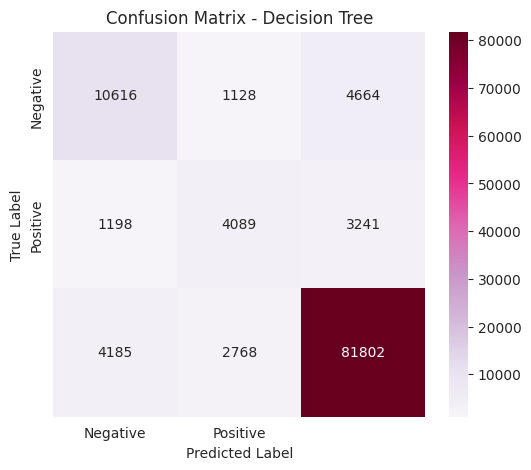

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_arr_dct, annot=True, fmt='d', cmap='PuRd', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [59]:
total_precision = calculate_precision(conf_arr_gs)
total_recall = calculate_recall(conf_arr_gs)
total_f_score = calculate_f_score(total_precision, total_recall)

print("Precision of the Algorithm : ", total_precision)
print("Recall  of the   Algorithm : ", total_recall)
print("F-Score  of the  Algorithm : ", total_f_score)

Precision of the Algorithm :  0.9899634829549321
Recall  of the   Algorithm :  0.9790052150507487
F-Score  of the  Algorithm :  0.9844538549590343


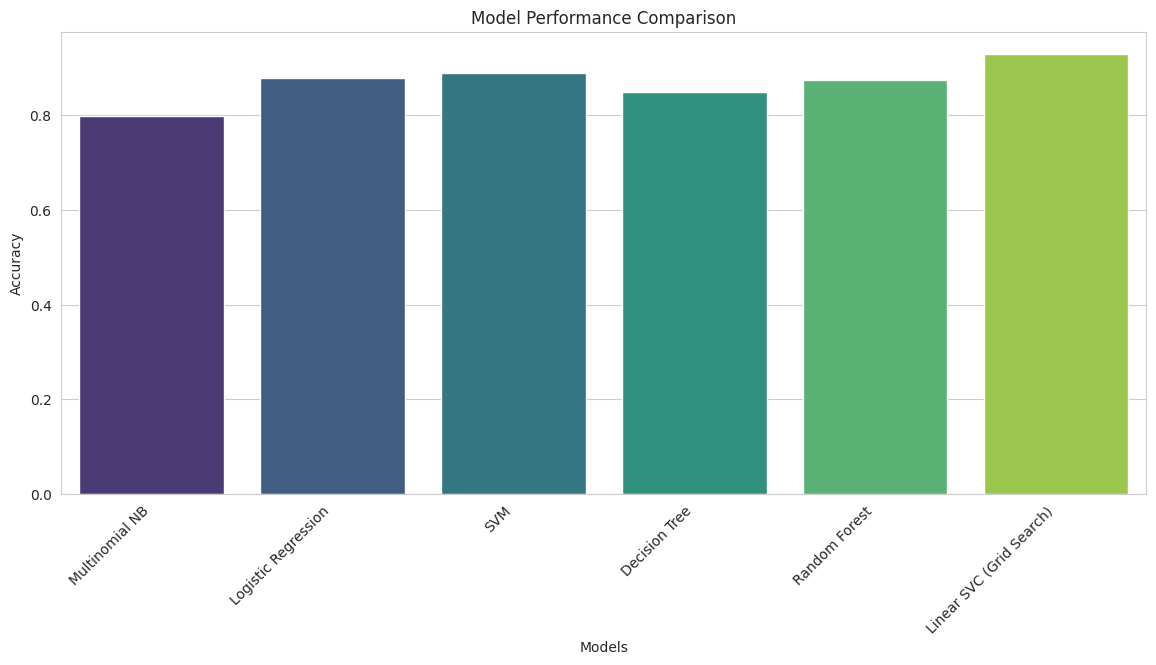

In [81]:
model_names = ['Multinomial NB', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest',
               'Linear SVC (Grid Search)']

accuracies = [acc_mnb,acc_log, acc_svm,acc_dt,acc_rf,acc_gs]

# Plot comparison
plt.figure(figsize=(14, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

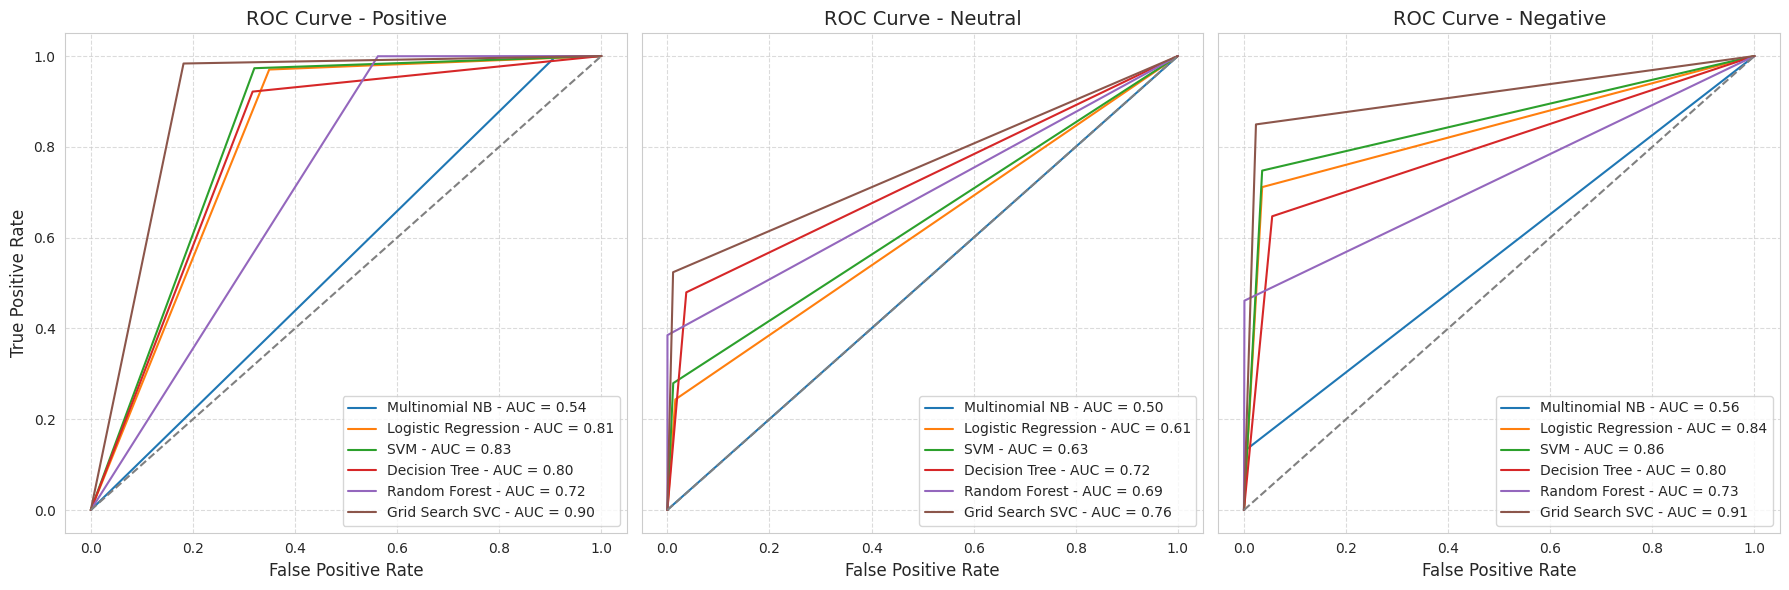

In [86]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for ROC curve
y_test_bin = label_binarize(X_test_targetSentiment, classes=['Positive', 'Neutral', 'Negative'])

# Define consistent colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
model_labels = ['Multinomial NB', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Grid Search SVC']

# Create separate plots for each class
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

class_names = ['Positive', 'Neutral', 'Negative']

for class_idx in range(3):
    ax = axes[class_idx]
    for idx, (name, y_pred) in enumerate(zip(model_labels,
                                             [predictedMultiNB, predictedLogReg, predictedLinearSVC,
                                              predictedDecisionTree, predictedRandomForest,
                                              predictedGS_clf_LinearSVC_pipe])):
        y_pred_bin = label_binarize(y_pred, classes=['Positive', 'Neutral', 'Negative'])
        fpr, tpr, _ = roc_curve(y_test_bin[:, class_idx], y_pred_bin[:, class_idx])
        roc_auc = auc(fpr, tpr)

        # Plot each model with the same color across all graphs
        ax.plot(fpr, tpr, label=f'{name} - AUC = {roc_auc:.2f}', color=colors[idx], linewidth=1.5)

    # Plot the diagonal line
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles and labels
    ax.set_title(f'ROC Curve - {class_names[class_idx]}', fontsize=14)
    ax.set_xlabel('False Positive Rate', fontsize=12)
    if class_idx == 0:
        ax.set_ylabel('True Positive Rate', fontsize=12)

    # Legend and grid
    ax.legend(loc='lower right', fontsize=10, frameon=True)
    ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
